Here's an example to optimize the Fourier coefficients until the sum can fit a desired profile (eg. a rectangular window function)

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

c:\Users\DELL\miniconda3\envs\torch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
w = torch.linspace(0.1,2,41) # for plotting
polynomial_target = torch.zeros(len(w))
polynomial_target = torch.zeros(len(w))
polynomial_target[int(0.25*len(w)):int(0.75*len(w))] = 1
def computeCurve(parameters):
    # polynomial_w = sum(c * w**i for i, c in enumerate(parameters))
    # polynomial_w = sum(c * np.cos(i*w) for i, c in enumerate(parameters))
    polynomial_w = sum(c * np.exp(1j*i*w) for i, c in enumerate(parameters))
    return polynomial_w 
def computeError(parameters):
    polynomial_w = computeCurve(parameters)
    # loss = nn.MSELoss()(polynomial_w, polynomial_target)
    loss_real = nn.MSELoss()(torch.real(polynomial_w), torch.real(polynomial_target))
    loss_imag = nn.MSELoss()(torch.imag(polynomial_w), torch.real(polynomial_target))
    loss = loss_real+loss_imag
    return loss


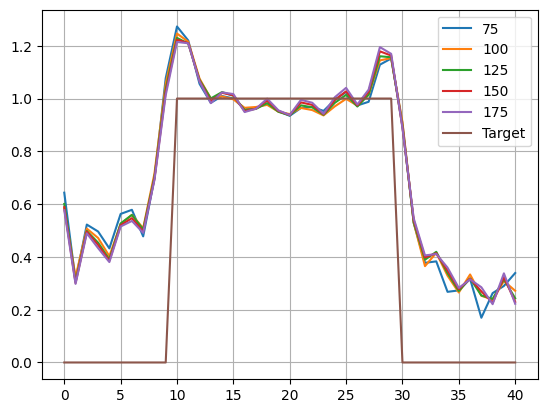

In [4]:
_num_terms = 40 # max number of fourier terms 
parameters = torch.tensor(np.random.rand(_num_terms), requires_grad=True)
fig, axes = plt.subplots(); legend = []
optimizer = torch.optim.Adam([parameters], lr=0.5) # Adaptive algorithm, better
for i in range(200):
    optimizer.zero_grad()
    f = computeError(parameters) 
    f.backward()
    optimizer.step()
    if(i%25==0 and i> 50):
        # print(f'Iteration {i} : (c0,c1,c2) = {[_c.item() for _c in [c0,c1,c2]]}; f = {f.item()}')
        axes.plot(abs(computeCurve(parameters)).detach().numpy())
        legend.append(i)
legend.append('Target')
axes.plot(polynomial_target)
axes.legend(legend)
axes.grid('on')